### Notebook that reads the output of FMDeg from TCGA dataset and visualize the scatter plot of the output

### Read data 

In [36]:
import pandas as pd
import numpy as np
import os
import re
import glob
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection

### paths

In [37]:
base="../../" 

# TCGA
path_output_ccle= os.path.join(base,"data","signals_E3_ligases_ccle.tsv")
path_colors = os.path.join(base,"degrons",'positive_selection','analysis',"dict_colors.json")
# Plots 
path_output_plots = os.path.join(base,"plots","Figure6")


In [38]:
def set_color(row,colors):
    if row["Cancer_Type"] in colors:
        return colors[row["Cancer_Type"]]
    else:
        return "black"

### Read DataFrame

### Type

In [39]:
df_e3_ligases = pd.read_csv(path_output_ccle,sep="\t")

### define colors

In [40]:
dict_colors = json.load(open(path_colors,'r'))


# Plot FM

### Prepare plots

In [41]:
df_e3_ligases["color"] = df_e3_ligases.apply(lambda row:set_color(row,dict_colors),axis=1)
df_e3_ligases["significant_FM"] = df_e3_ligases.apply(lambda row: row["oncodrivefml_qvalue"]<0.1,axis=1)
df_e3_ligases["significant_SM"] = df_e3_ligases.apply(lambda row: row["dndscv_qvalue"]<0.1,axis=1)

In [42]:
df_e3_ligases.head()

Hugo_Symbol Cancer_Type  oncodrivefml_qvalue  log_qvalue_fml  dndscv_qvalue  \
0       KEAP1         PAN             0.000621        3.206886       0.012522   
1       RAPSN         PAN             0.000621        3.206886       0.993241   
2       FBXW7         PAN             0.000621        3.206886       0.011744   
3      DCAF17         PAN             0.001132        2.945973       1.000000   
4       FANCL         PAN             0.015752        1.802674       1.000000   

   n_mis  n_non  n_spl  log_qvalue_dndscv    color  significant_FM  \
0   62.0    7.0    0.0       1.902310e+00  #dd1c77            True   
1   27.0    1.0    0.0       2.945241e-03  #dd1c77            True   
2   44.0    7.0    4.0       1.930185e+00  #dd1c77            True   
3    8.0    0.0    1.0       1.662065e-08  #dd1c77            True   
4   17.0    4.0    0.0       1.662065e-08  #dd1c77            True   

   significant_SM  
0            True  
1           False  
2            True  
3           False  
4           False

### Matplotlib

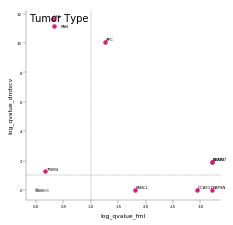

In [43]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
df_sigs = df_e3_ligases[(df_e3_ligases["significant_FM"])|(df_e3_ligases["significant_SM"])]
df_not_sigs = df_e3_ligases[~((df_e3_ligases["significant_FM"])|(df_e3_ligases["significant_SM"]))
                            &(df_e3_ligases["oncodrivefml_qvalue"]<1.0)&(df_e3_ligases["dndscv_qvalue"]<1.0)].sample(frac=0.1)
for cancer_type in df_sigs["Cancer_Type"].unique():
    ys = df_sigs[df_sigs["Cancer_Type"]==cancer_type]["log_qvalue_dndscv"].values
    xs = df_sigs[df_sigs["Cancer_Type"]==cancer_type]["log_qvalue_fml"].values
    sc=ax.scatter(x=xs,y=ys,color=dict_colors[cancer_type],s=20,linewidths=0.0,label=cancer_type,marker="o")
    for i in range(len(xs)):
        ax.annotate(xy=(xs[i]+0.01,ys[i]+0.1),s=df_sigs[(df_sigs["Cancer_Type"]==cancer_type)]["Hugo_Symbol"].values[i],fontsize=4,fontweight="normal")
        pass
# create the coordinates for the errorbars

ax.set_ylabel("log_qvalue_dndscv",fontsize=6)
ax.set_xlabel("log_qvalue_fml",fontsize=6)
marker_size = 20
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
ax.legend(handler_map={type(sc): HandlerPathCollection(update_func=update_prop)},scatterpoints=1, frameon=False, labelspacing=0.25, title='Tumor Type',markerscale=1,loc="upper left",fontsize=4)
ax.scatter(x=df_not_sigs["log_qvalue_fml"].values,y=df_not_sigs["log_qvalue_dndscv"].values,color="grey",s=10,alpha=0.5,linewidths=0)

#x=ax.legend()
# Adjust axis
#ylim = (0,5)
#ax.set_ylim(ylim)
#ax.set_yticks([x for x in range(ylim[0],ylim[1]+1,1)])
ax.axvline(x=-np.log10(0.1),ymin=0,ymax=np.nanmax(df_sigs["log_qvalue_dndscv"].values),color="black",ls="--",lw=0.2)
ax.axhline(y=-np.log10(0.1),xmin=0,xmax=np.nanmax(df_sigs["log_qvalue_fml"].values),color="black",ls="--",lw=0.2)
ax.tick_params(axis = 'y', labelsize =4  , pad=0.5 ,width=0.25)
ax.tick_params(axis = 'x', labelsize =4  , pad=0.5 ,width=0.25)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.25)
ax.spines['bottom'].set_linewidth(0.25)
plt.savefig(path_output_plots+'/E3_ligases_CCLE.pdf', dpi=100,bbox_inches="tight")
plt.show()
None
